In [1]:
print('test')

test


In [2]:
import pandas as pd
import numpy as np

In [4]:
# http://bit.ly/bream_list
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [5]:
#http://bit.ly/smelt_list
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [6]:
fish_length=np.array(bream_length+smelt_length)

In [7]:
fish_weight=np.array(bream_weight+smelt_weight)

In [8]:
fish_data=np.column_stack((fish_length,fish_weight))
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [9]:
fish_target=np.concatenate((np.ones(35),np.zeros(14)))

In [17]:
fish_data= fish_length.reshape(-1,1)
fish_data
fish_target=fish_weight
fish_target

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,    6.7,    7.5,    7. ,    9.7,    9.8,
          8.7,   10. ,    9.9,    9.8,   12.2,   13.4,   12.2,   19.7,
         19.9])

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(fish_data,fish_target)

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9607066428120762

In [24]:
print(model.predict([[50]]))
print('y=wX+b','w=',model.coef_,'b=',model.intercept_)

[1129.30991834]
y=wX+b w= [30.35247933] b= -388.31404825356657


In [21]:
import matplotlib.pyplot as plt

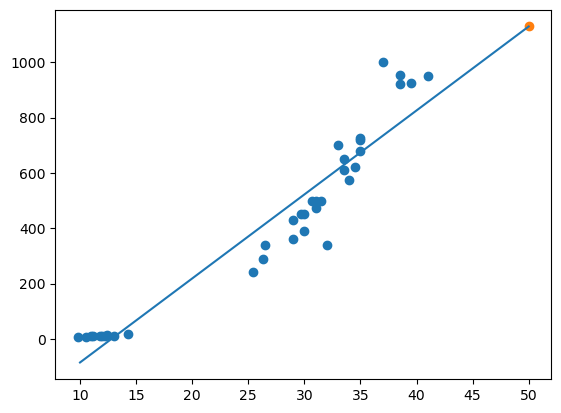

In [31]:
plt.scatter(X_train,y_train)
plt.scatter(50,model.predict([[50]]))
plt.plot([10,50],[10*model.coef_[0]+model.intercept_,1129.30991834])

In [34]:
X_train2=np.column_stack((X_train**2,X_train))
X_test2=np.column_stack((X_test**2,X_test))

In [35]:
model=LinearRegression()
model.fit(X_train2,y_train)
model.score(X_test2,y_test)

0.9675569455256874

In [36]:
model.predict([[50**2,50]])

array([1777.49959746])

In [37]:
model.coef_, model.intercept_

(array([  1.12160168, -23.00969845]), 123.98032558635492)

In [39]:
print('y={}x**2+{}x+{}'.format(model.coef_[0],model.coef_[1],model.intercept_))

y=1.1216016777603488x**2+-23.009698450460824x+123.98032558635492


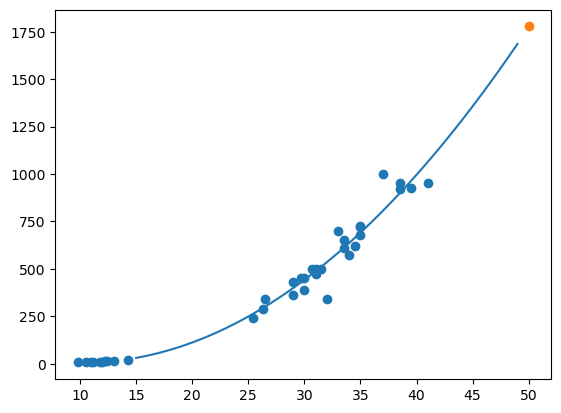

In [42]:
point=np.arange(15,50)
plt.scatter(X_train,y_train)
plt.plot(point,1.12*point**2+-23.01*point+123.98)
plt.scatter(50,model.predict([[50**2,50]]))

In [43]:
pd.read_csv('https://bit.ly/perch_csv')

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5)
poly.fit([[2,3]])
poly.transform([[2,3]])
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1',
       'x0 x1^2', 'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3',
       'x1^4', 'x0^5', 'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4',
       'x1^5'], dtype=object)

In [60]:
poly=PolynomialFeatures(degree=5)
poly.fit(X_train)
X_train3=poly.transform(X_train)
X_test3=poly.transform(X_test)
model=LinearRegression()
model.fit(X_train3,y_train)
model.score(X_test3,y_test)


0.9685930857175198

In [61]:
poly.transform([[50]])
model.predict(poly.transform([[50]]))

array([-2845.49331764])

In [135]:
fish=pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [136]:
from sklearn.model_selection import train_test_split
X=fish.to_numpy()
X=X[:,1:]
y=fish.to_numpy()
y=y[:,0]
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
#model.score(X_test,y_test)

0.45

In [86]:
model.predict(X_test[:5])

array(['Parkki', 'Bream', 'Parkki', 'Roach', 'Perch'], dtype=object)

In [88]:
model.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [89]:
model.predict_proba(X_test[:5])

array([[0.        , 0.33333333, 0.33333333, 0.        , 0.33333333,
        0.        , 0.        ],
       [0.66666667, 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.        , 0.        ,
        0.        , 0.33333333],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667,
        0.        , 0.        ],
       [0.        , 0.        , 0.66666667, 0.        , 0.33333333,
        0.        , 0.        ]])

In [95]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Users\Supervisor\anaconda3\envs\vm11\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.875

In [96]:
model.predict(X_test[:5])

array(['Perch', 'Bream', 'Perch', 'Perch', 'Parkki'], dtype=object)

In [108]:
for arr in model.predict_proba(X_test[:5]):
    for ele in arr:
        print('{:.1f}%'.format(ele*100),end=',')
    print()

0.3%,8.5%,38.0%,23.7%,29.4%,0.0%,0.2%,
98.4%,0.7%,0.4%,0.0%,0.3%,0.0%,0.1%,
0.2%,2.6%,69.1%,16.7%,11.3%,0.0%,0.2%,
0.5%,9.8%,38.5%,21.1%,29.8%,0.0%,0.3%,
21.1%,33.2%,11.5%,0.9%,33.0%,0.0%,0.3%,


In [109]:
model.coef_,model.intercept_

(array([[ 0.23057742, -0.61478183, -0.07337112,  1.03290545, -0.08124825],
        [ 0.21868337, -0.1747002 , -0.1250444 ,  0.36606735, -0.01532569],
        [ 0.22443025,  0.26706973, -0.37623454, -0.34602195,  0.36699988],
        [ 0.22164603,  0.16280311, -0.00608486, -1.0457709 , -0.34007129],
        [ 0.21701412, -0.15328083,  0.00746904, -0.01284766,  0.04321351],
        [-1.34849714,  0.73117009,  0.80596455,  0.08019699,  0.05448178],
        [ 0.23614596, -0.21828006, -0.23269866, -0.07452928, -0.02804994]]),
 array([-0.0235799 , -0.00070777,  0.07177862, -0.07875027, -0.02522057,
         0.07393509, -0.0174552 ]))

In [115]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)# 평균 :0 분산
X_test=scaler.fit_transform(X_test)

In [122]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(max_iter=10)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8487394957983193
0.775


C:\Users\Supervisor\anaconda3\envs\vm11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [124]:
model.partial_fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8151260504201681
0.8


In [134]:
train_score=[]
test_score=[]

model=SGDClassifier(loss='log',random_state=42)
for _ in range(3000): 
    model.partial_fit(X_train,y_train)
    train_score.append(model.score(X_train,y_train))
    test_score.append(model.score(X_test,y_test))

InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'huber', 'modified_huber', 'squared_hinge', 'squared_error', 'hinge', 'perceptron', 'log_loss', 'epsilon_insensitive', 'squared_epsilon_insensitive'}. Got 'log' instead.

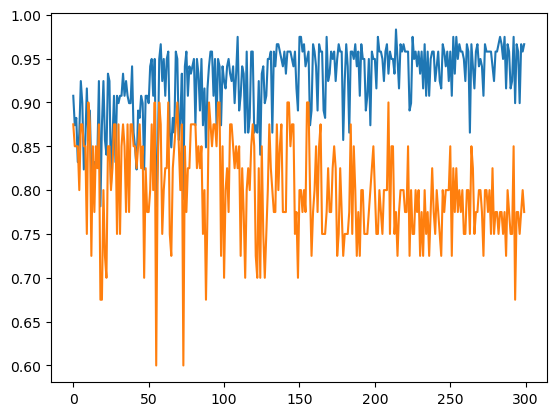

In [130]:
plt.plot(train_score)
plt.plot(test_score)

In [170]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=12)
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.8

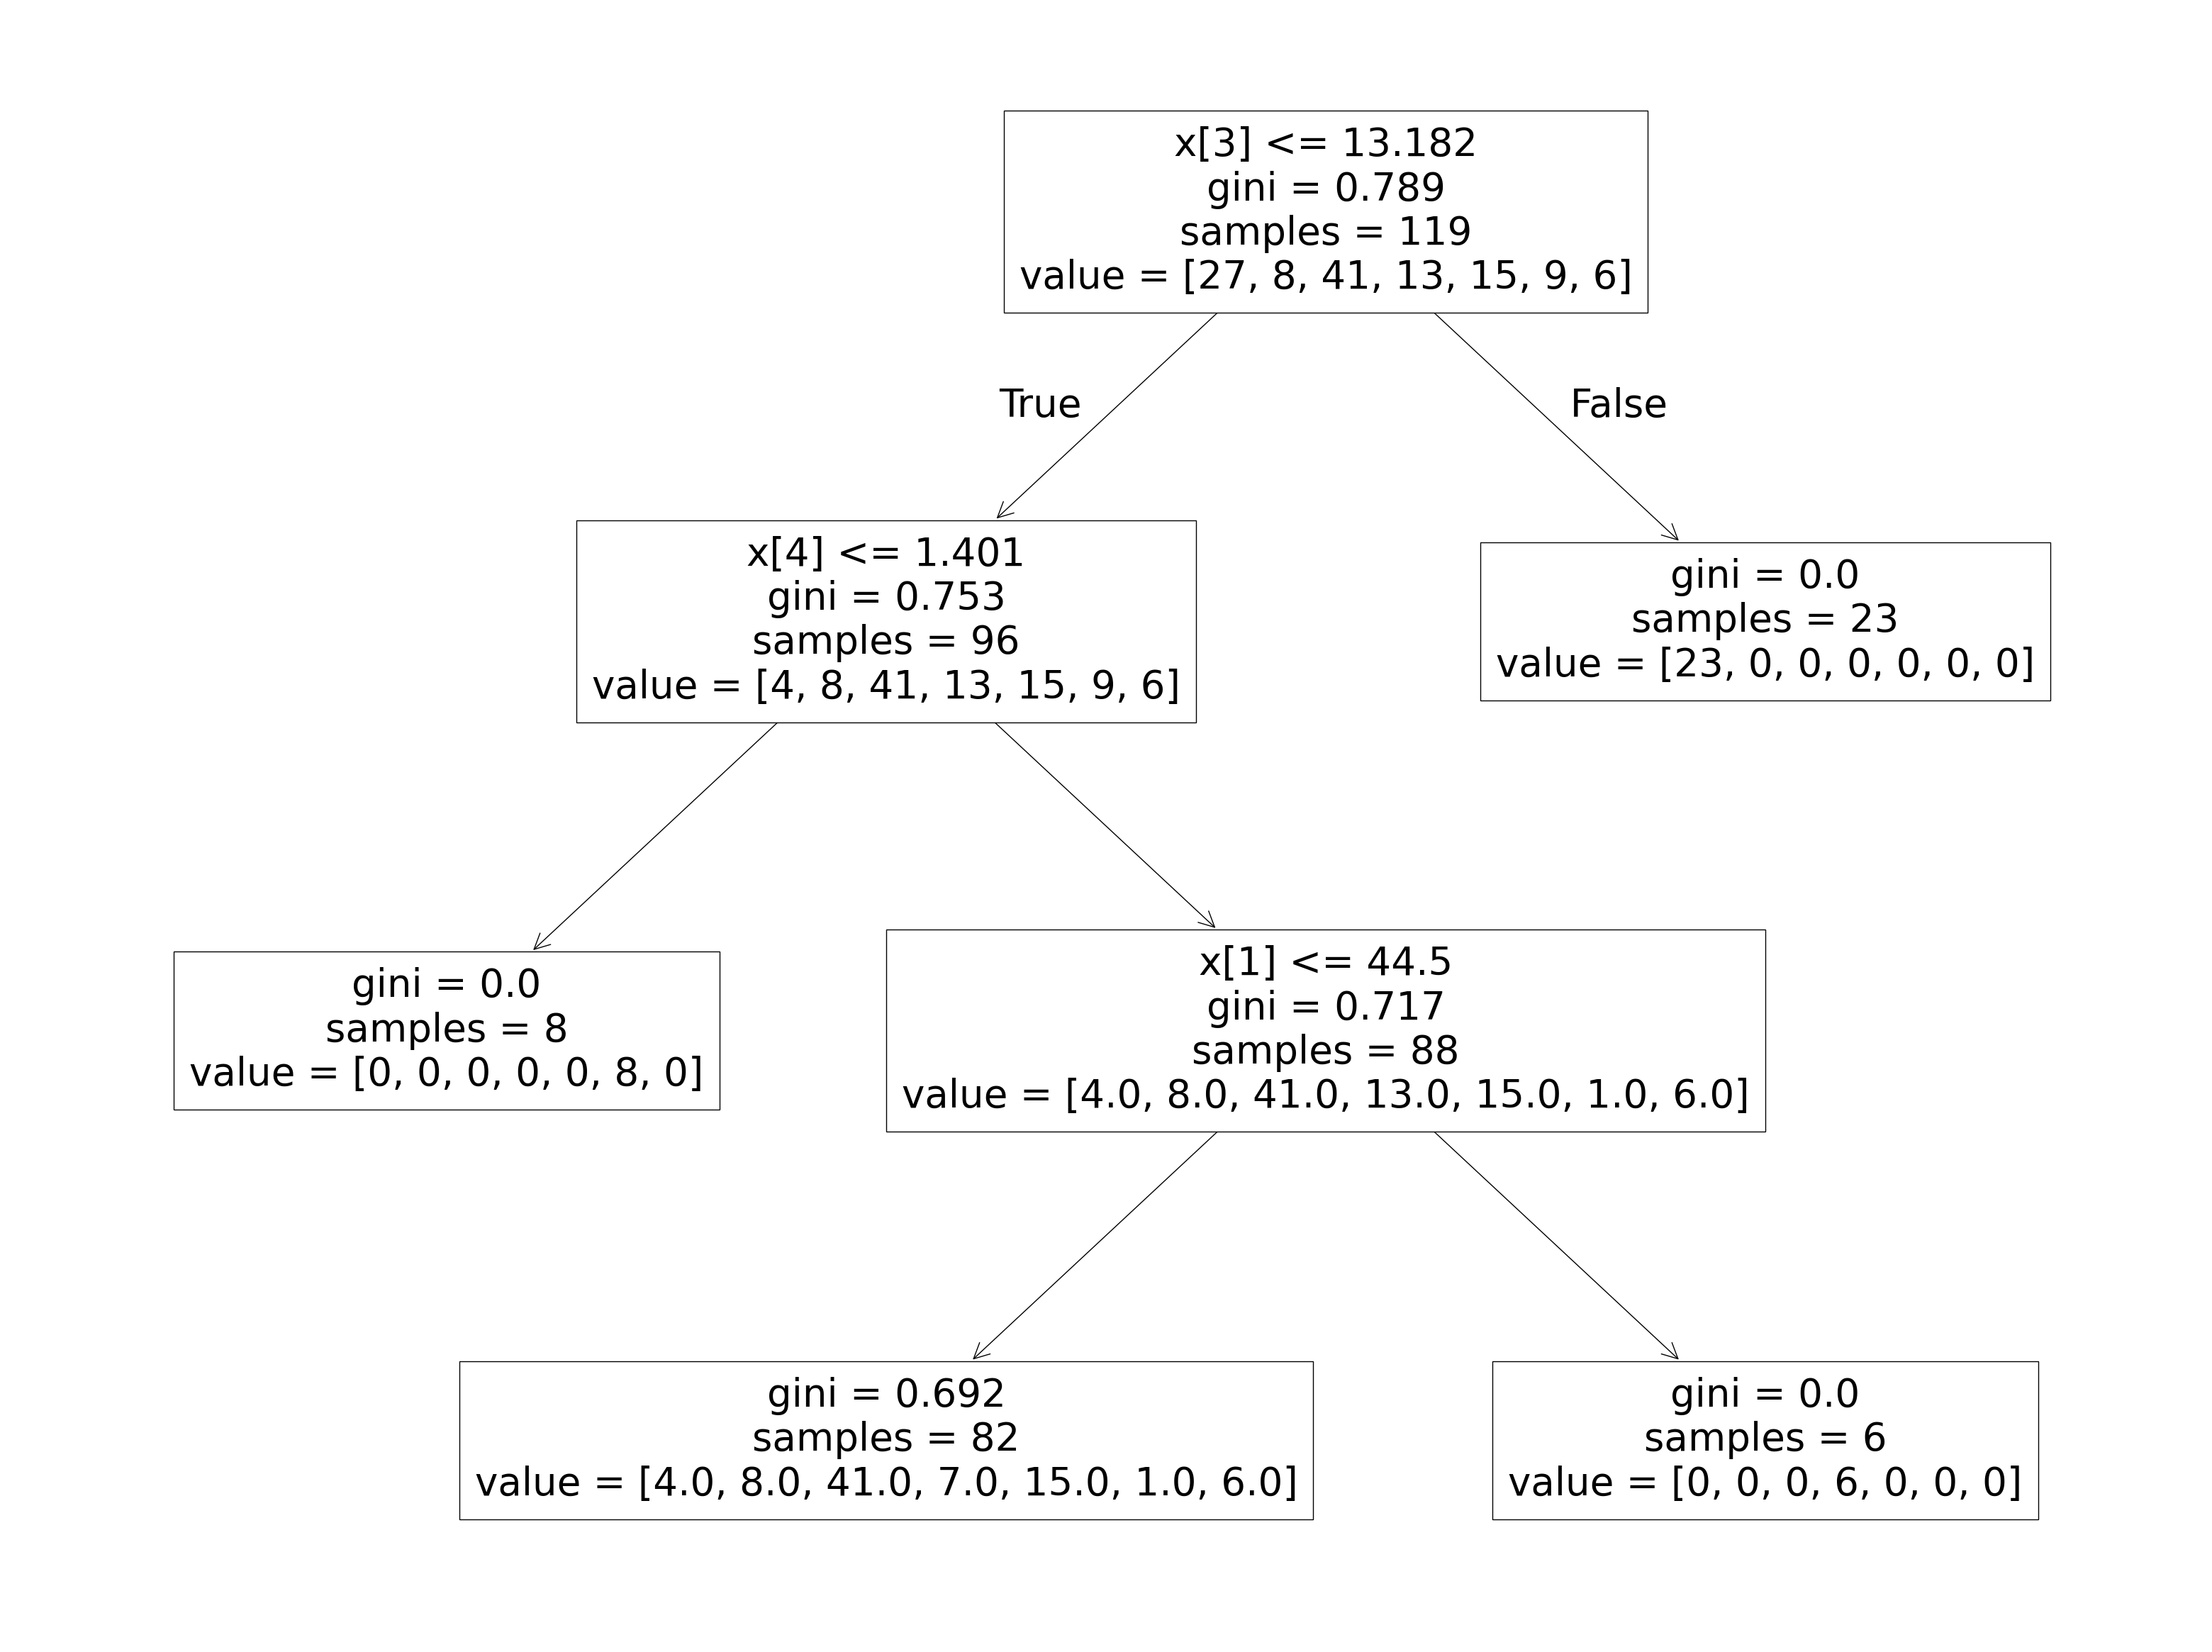

In [160]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(40,30))
plot_tree(model)
plt.show()

In [151]:
import graphviz
from sklearn import tree
gdata=tree.export_graphviz(model)
graphviz.sources(gdata)

TypeError: 'module' object is not callable

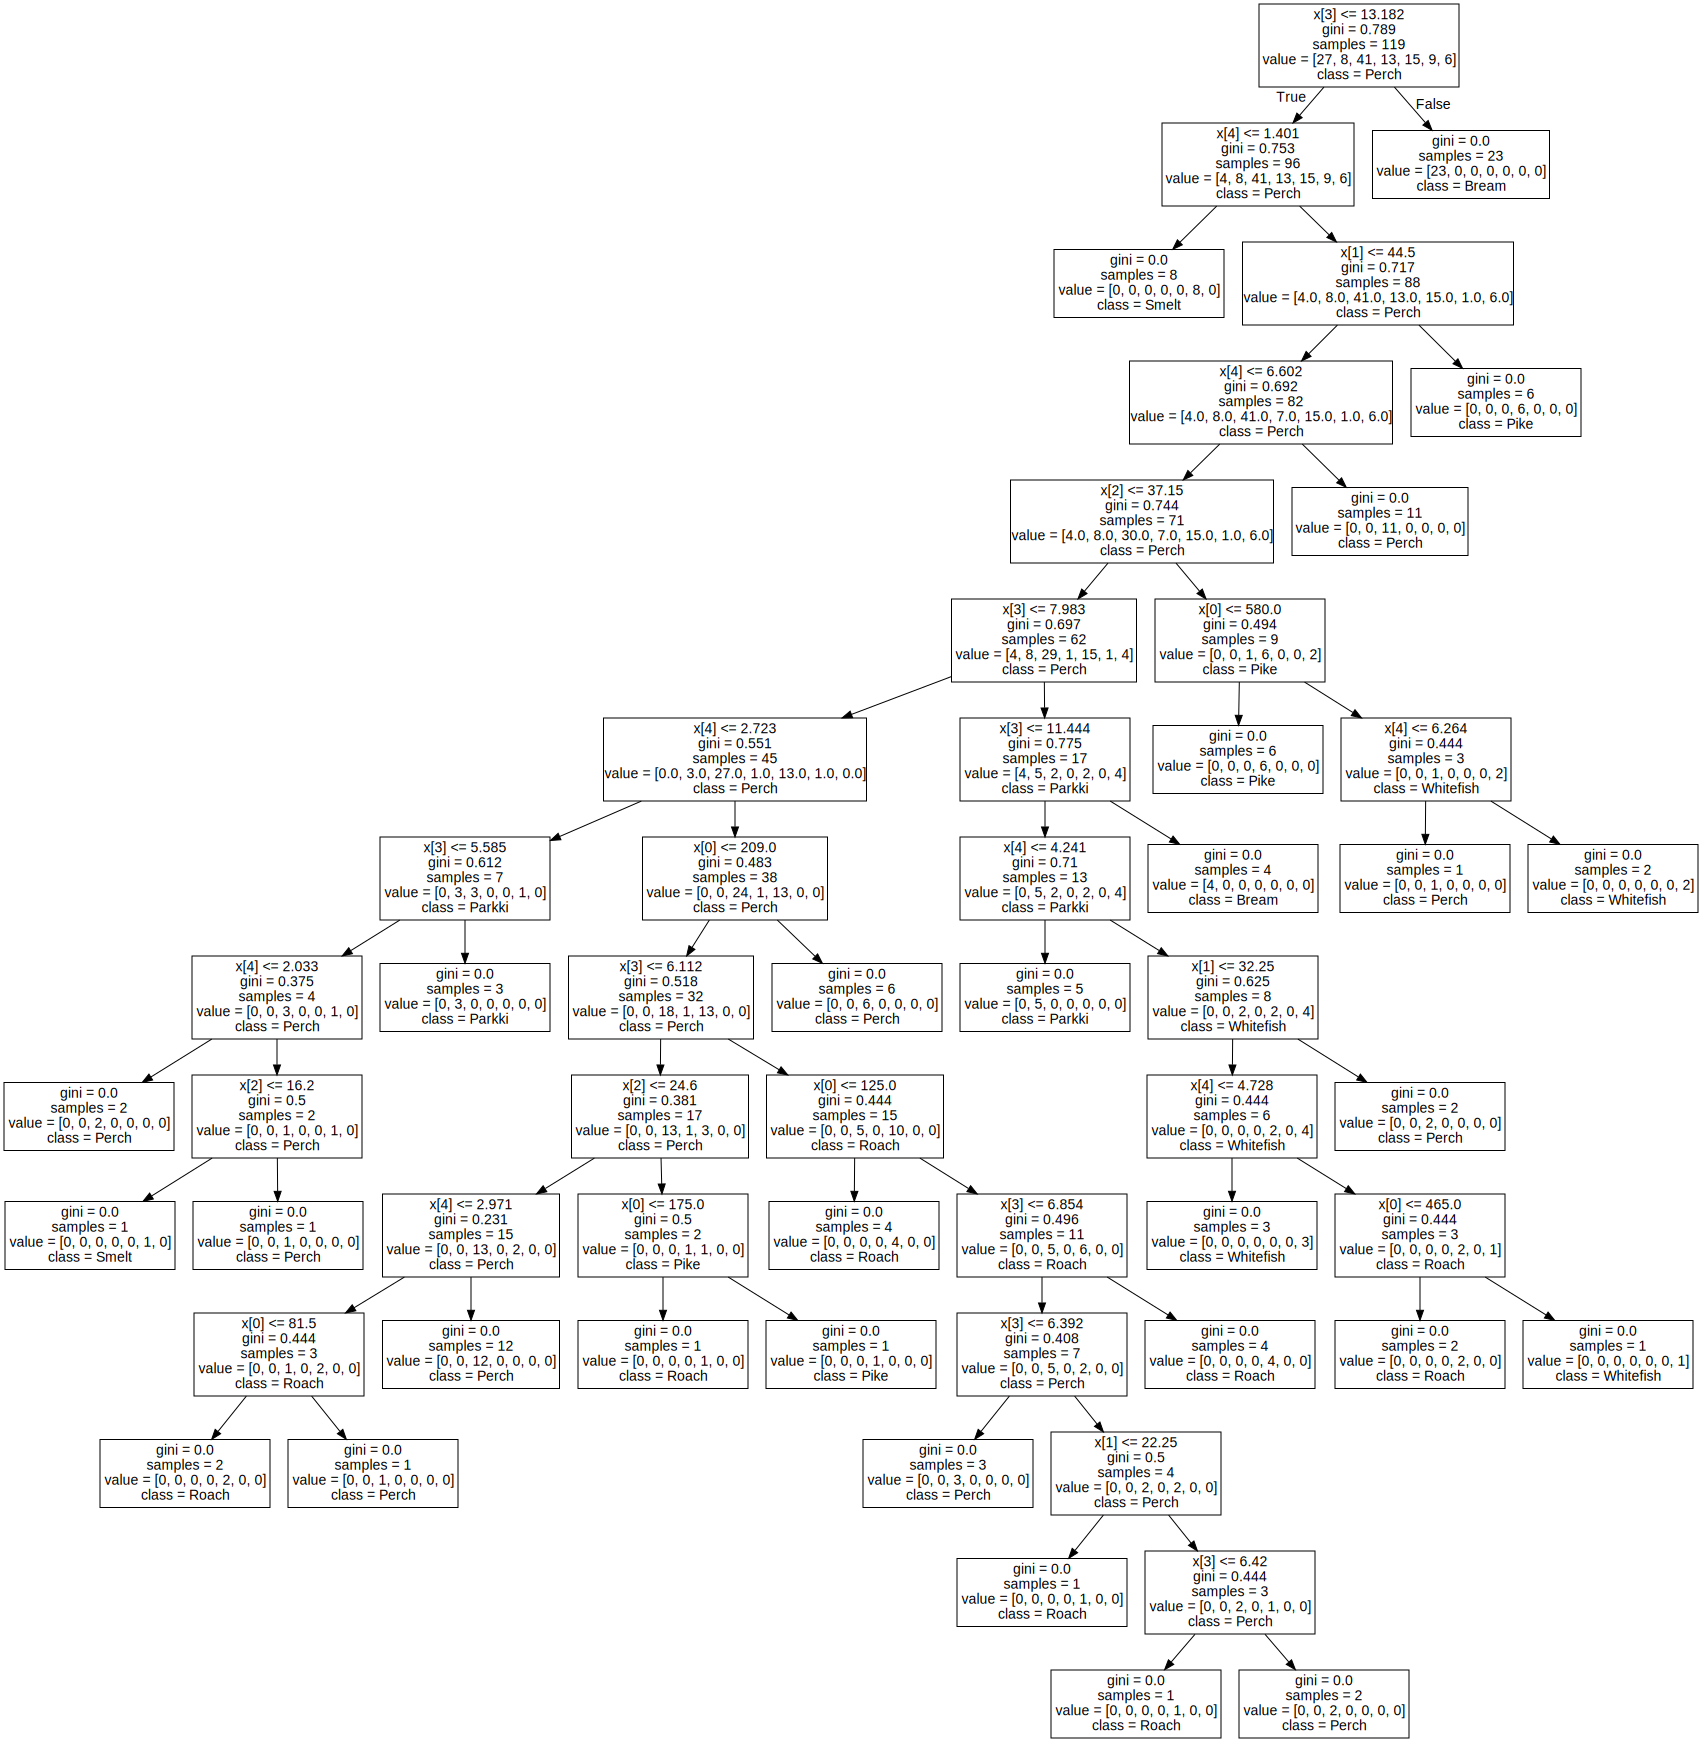

In [158]:
g=tree.export_graphviz(model,
                #out_file="tree.dot",
                class_names=['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']
                    )

# 생성한 tree.dot파일을 읽어서 jupyter notebook 상에서 시각화
#with open("tree.dot") as f:
#    dot_graph = f.read()
graph = graphviz.Source(g)
graph
#graph.render(filename='test', format='png')

In [155]:
np.unique( y_train)

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [161]:
model.feature_importances_

array([0.        , 0.17101865, 0.        , 0.58042391, 0.24855744])

In [163]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

AttributeError: 'numpy.ndarray' object has no attribute 'corr'